In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("BASEBALL.csv")

In [4]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')



# Input   columns/data  preset  are :
### Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#  Output data is :
###  Number of predicted wins (W)

### This dataset utilizes data from 2014 Major League Baseball seasons in order  There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Defining each  features :


# W : 
## Number of predicted wins 
# R : 
## Runs scored: number of times a player crosses home plate
# AB : 
## At bats per home run: at bats divided by home runs
# H :  
## Hit: reaching base because of a batted, fair ball without error by the defense
# 2B   :
## Double: hits on which the batter reaches second base safely without the contribution of a fielding error
# 3B : 
## Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
# HR  :
## Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
# BB : 
## Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
# SO  : 
## strikeout: number of times a batter strikes out to their plate appearance
# SB : 
## Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

# RA  :
## Run average: number of runs allowed times nine divided by innings pitched
# ER 
##  Earned run: number of runs that did not occur as a result of errors or passed balls

# ERA  : 
## Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

# CG  :
## Complete game: number of games where player was the only pitcher for their team
# SHO : 
## Shutout: number of complete games pitched with no runs allowed
# SV : 
## Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

# E " 
## Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

# checking for  null data 

In [6]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## there  is no null data in the data set 

# checking the first 5 elements

In [7]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86



# checking last 5 variables 

In [8]:
data. tail ()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# checking shape of the data set i.e rows and columns

In [9]:
data.shape

(30, 17)

###  there are 30 rows and 17 columns in the data set 

# checking data types present in the data set

In [10]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

## it has  all the columns as integer except ERP which is float data type 

# checking for   total non null value  count and data type

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Descriptive Statistics

## describing the dataset 

In [12]:


data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### in the above data we can see that  for "W" mean is  almost  eqaual to median (50th percentile )
###  For  "R"   there is very less skewness 
###  For  "AB"   there is very less skewness 
### For  "H   there is very less skewness 
### For  "2B" there is very less skewness 
### For  "3B"  mean is  almost  eqaual to median (50th percentile )
### For   "HR "   there is very less skewness 
### For   "BB"   there is very less skewness 

### For   "SO" there is very less skewness 
### For   "SB	"   there is  no skewness,  median = mode 

### For   "RA"   there is very less skewness 
### For   "ER"   there is very less skewness 
### For   "ERA"   there is very less skewness 
### For   "CG"   there is very less skewness 
### For   "SHO"   there is very less skewness 
### For   "SV"   there is very less skewness 
### For   "E"   there is very less skewness 


### OUTLIERS   CAN BE  PRESET  IN  ALL THE  COLUMNS EXCEPT  ERA ,  WERE STANDARD DEVIATION IS NEAR TO 1
### ALL OTHERS  COLUMNS MAY HAVE HIGHER DATA SPREAD 

# finding IQR  (Inter Quartile Range)

### IQR  for "W"

In [13]:

Q3 = 87.750000
Q1 = 74.000000
IQR = Q3-Q1
IQR

13.75

### IQR  for "R"

In [14]:
Q3 = 718.250000	
Q1 = 651.250000
IQR = Q3-Q1
IQR

67.0

### IQR  for "AB"

In [15]:
Q3 = 5570.000000
Q1 = 5464.000000
IQR = Q3-Q1
IQR

106.0

### IQR  for "H"

In [16]:
Q3 = 1451.500000
Q1 = 1363.000000
IQR = Q3-Q1
IQR

88.5

### IQR  for "2B"

In [17]:
Q3 = 288.750000
Q1 = 262.250000
IQR = Q3-Q1
IQR

26.5

### IQR  for "3B"

In [18]:
Q3 = 39.000000
Q1 = 23.000000
IQR = Q3-Q1
IQR

16.0

### IQR  for "HR"

In [19]:
Q3 = 177.000000
Q1 = 140.250000
IQR = Q3-Q1
IQR

36.75

### IQR  for "BB"

In [20]:
Q3 = 501.250000
Q1 = 428.250000
IQR = Q3-Q1
IQR

73.0

### IQR  for "SO"

In [21]:
Q3 =  1311.50000
Q1 =  1157.50000
IQR = Q3-Q1
IQR

154.0

### IQR  for "SB"

In [22]:
Q3 =  96.500000
Q1 = 69.000000
IQR = Q3-Q1
IQR

27.5

### IQR  for "RA"

In [23]:
Q3 =  732.500000
Q1 =  636.250000
IQR = Q3-Q1
IQR

96.25

### IQR  for "ER"

In [24]:
Q3 =  679.250000
Q1 =  587.250000
IQR = Q3-Q1
IQR

92.0

### IQR  for "ERA"

In [25]:
Q3 =  4.220000
Q1 =  3.682500
IQR = Q3-Q1
IQR

0.5374999999999996

### IQR  for "CG"

In [26]:
Q3 =  5.750000
Q1 = 1.000000
IQR = Q3-Q1
IQR

4.75

### IQR  for "SHO"

In [27]:
Q3 = 13.000000
Q1 =  9.000000
IQR = Q3-Q1
IQR

4.0

### IQR  for "SV"

In [28]:
Q3 =  46.750000
Q1 =  37.250000
IQR = Q3-Q1
IQR

9.5

 ### IQR  for "E"

In [29]:
Q3 =  96.750000

Q1 = 86.000000
IQR = Q3-Q1
IQR

10.75

# checking for duplicate data

In [30]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

#  total number of unique values in each columns 

In [31]:
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# Univariate Analysis


## plotting graph to check the distribution of each data 

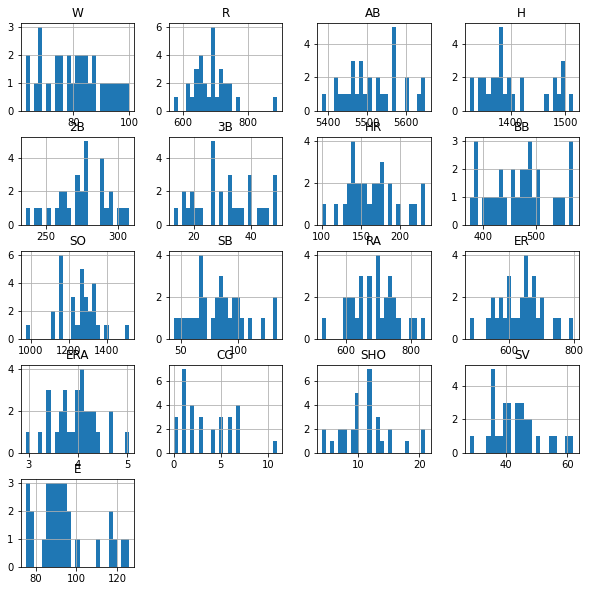

In [32]:

data.hist(bins=25,figsize=(10,10))
plt.show()

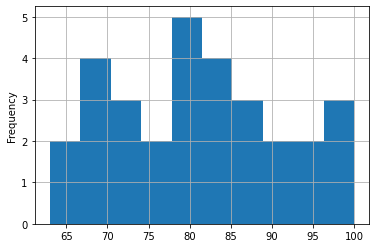

In [33]:
data["W"].plot(kind='hist' , grid = True)
plt.show()

# highest frequescy for win is 80 

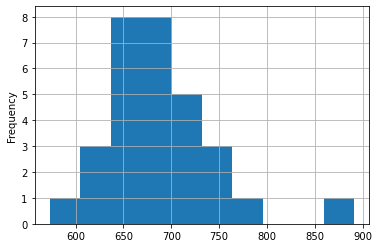

In [34]:
data["R"].plot(kind='hist' , grid = True)
plt.show()

# highest frequescy for R  lies between 640 to 700 

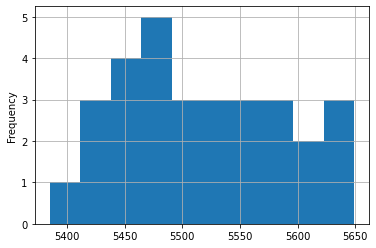

In [35]:
data["AB"].plot(kind='hist' , grid = True)
plt.show()

# highest frequency of AB lies between 5460 to 5480

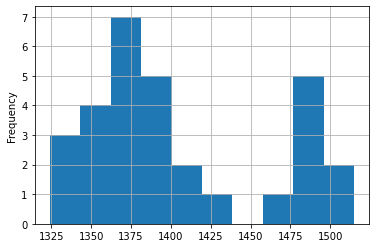

In [36]:
data["H"].plot(kind='hist' , grid = True)
plt.show()

# frequency of H is high between 1355 to 1370

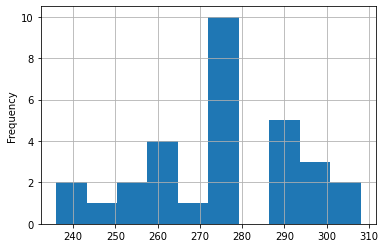

In [37]:
data["2B"].plot(kind='hist' , grid = True)
plt.show()

# frequency of 2B is high between the values  273 to 279

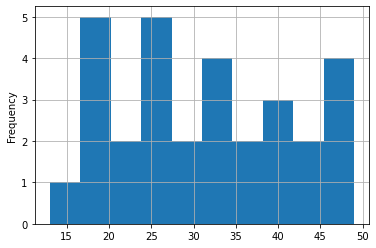

In [38]:
data["3B"].plot(kind='hist' , grid = True)
plt.show()

# frequency of  3B is high between the values  18 to 20 and  24,25 

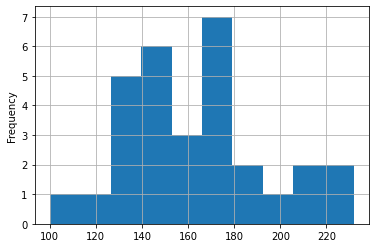

In [39]:
data["HR"].plot(kind='hist' , grid = True)
plt.show()

# frequency of HR is high between the values   165 to 179

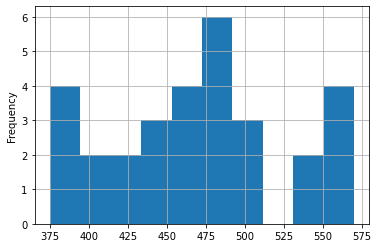

In [40]:
data["BB"].plot(kind='hist' , grid = True)
plt.show()

# frequency of  BB is high between the values  470 to 490

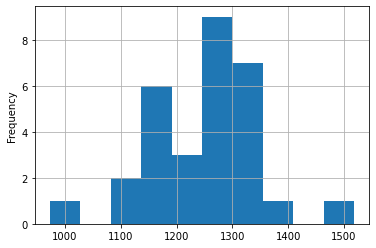

In [41]:
data["SO"].plot(kind='hist' , grid = True)
plt.show()

# frequency of   SO is high between the values   1250 to 1300

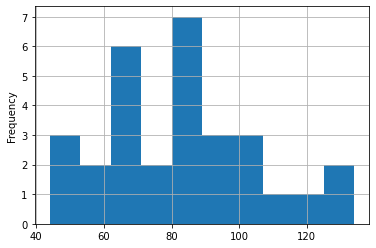

In [42]:
data["SB"].plot(kind='hist' , grid = True)
plt.show()

# frequency of    SB is high between the values   80 to 85

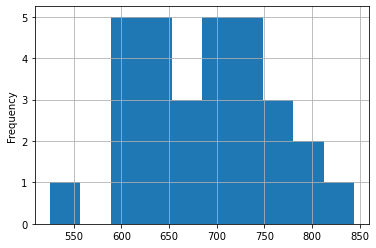

In [43]:
data["RA"].plot(kind='hist' , grid = True)
plt.show()


# frequency of    RA is high between the values    590 to  650  and 680 to 750

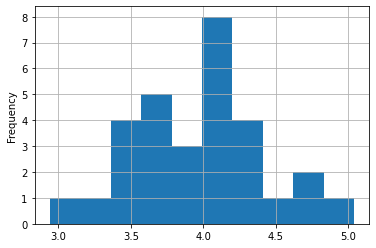

In [44]:
data["ERA"].plot(kind='hist' , grid = True)
plt.show()


# frequency of    ERA is high between the values   4 to 4.2

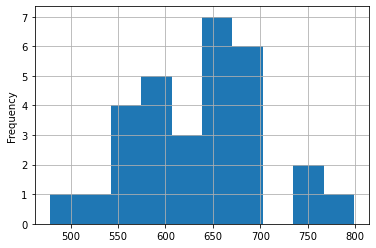

In [45]:
data["ER"].plot(kind='hist' , grid = True)
plt.show()



# frequency of    ER is high between the values   645 to 700


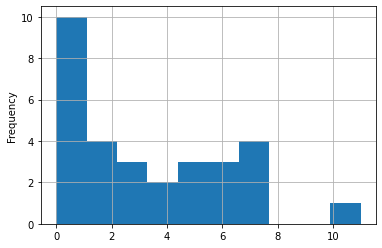

In [46]:
data["CG"].plot(kind='hist' , grid = True)
plt.show()



# frequency of    CG  is high between the values    0 to 1


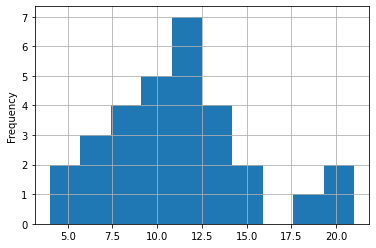

In [47]:
data["SHO"].plot(kind='hist' , grid = True)
plt.show()


# frequency of    SHO  is high between the values     11 to    12.5 


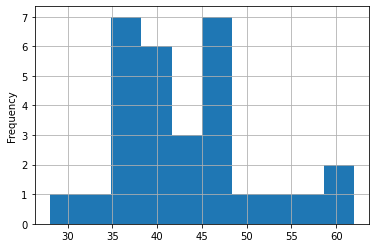

In [48]:
data["SV"].plot(kind='hist' , grid = True)
plt.show()


# frequency of    SV  is high between the values    35 to 38  and 45 to 48


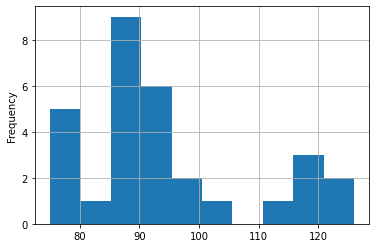

In [49]:
data["E"].plot(kind='hist' , grid = True)
plt.show()


## frequency of    E  is high between the values    85 to 90 


# with the help of box plot   checking for outliers 

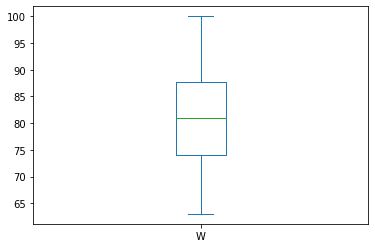

In [50]:
data["W"].plot(kind='box')
plt.show()

 ### W   shows no  outliers in the above graph 

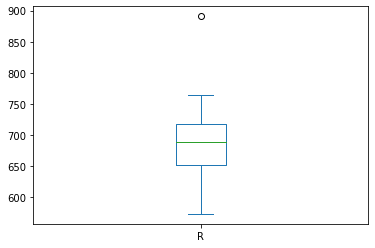

In [51]:
data["R"].plot(kind='box')
plt.show()

 ### R    shows  very less  outliers in the above graph 

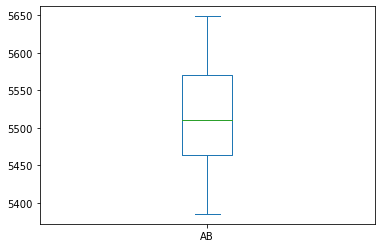

In [52]:
data["AB"].plot(kind='box')
plt.show()

 ### AB    shows  no  outliers in the above graph 

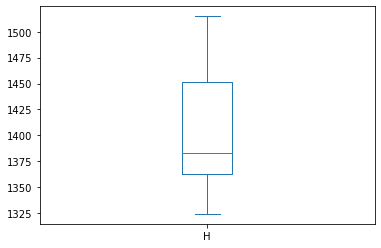

In [53]:
data["H"].plot(kind='box')
plt.show()

 ### H    shows  no  outliers in the above graph 


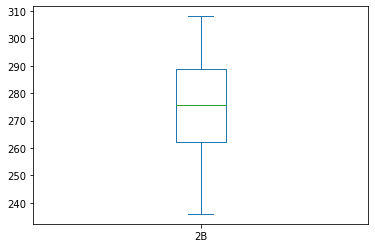

In [54]:
data["2B"].plot(kind='box')
plt.show()

 ### 2B    shows  no  outliers in the above graph 


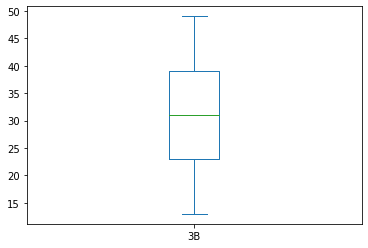

In [55]:
data["3B"].plot(kind='box')
plt.show()

 ### 3B    shows  no  outliers in the above graph 


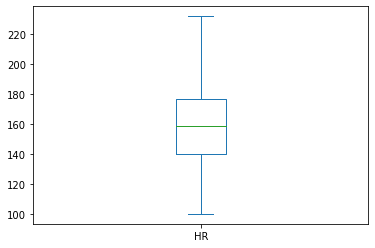

In [56]:
data["HR"].plot(kind='box')
plt.show()

 ### HR    shows  no  outliers in the above graph 


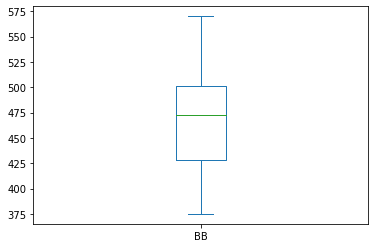

In [57]:
data["BB"].plot(kind='box')
plt.show()

 ### BB    shows  no  outliers in the above graph 


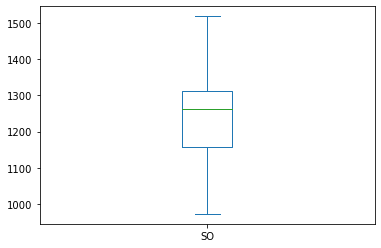

In [58]:
data["SO"].plot(kind='box')
plt.show()

 ### SO    shows  no  outliers in the above graph 


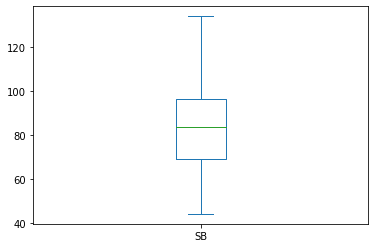

In [59]:
data["SB"].plot(kind='box')
plt.show()

 ###    SB    shows  no  outliers in the above graph 


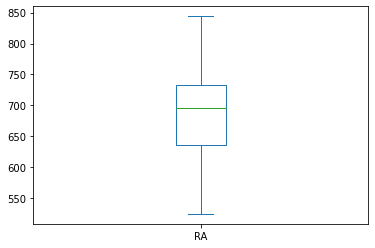

In [60]:
data["RA"].plot(kind='box')
plt.show()

 ###  RA    shows  no  outliers in the above graph 


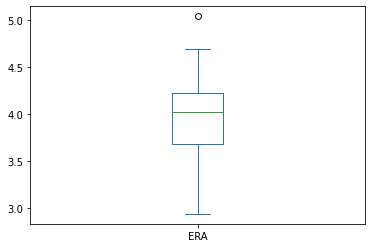

In [61]:
data["ERA"].plot(kind='box')
plt.show()

 ###  ERA    shows  very less  outliers in the above graph 


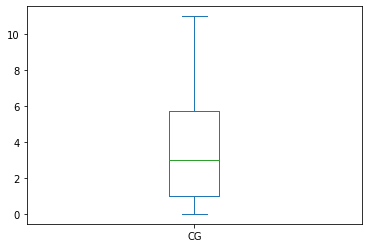

In [62]:
data["CG"].plot(kind='box')
plt.show()

 ###   CG     shows  no  outliers in the above graph 


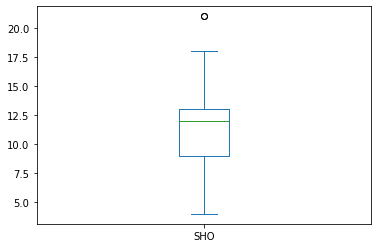

In [63]:
data["SHO"].plot(kind='box')
plt.show()

 ###  SHO    shows  very less  outliers in the above graph 


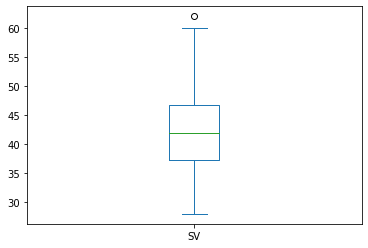

In [64]:
data["SV"].plot(kind='box')
plt.show()

 ###  SV    shows  very less  outliers in the above graph 


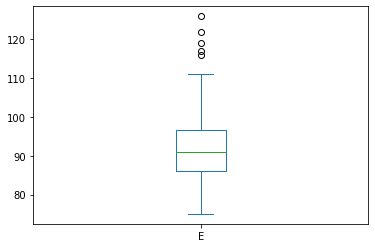

In [65]:
data["E"].plot(kind='box')
plt.show()

 ### E    shows   good number of   outliers in the above graph 


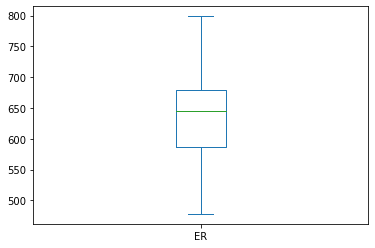

In [66]:
data["ER"].plot(kind='box')
plt.show()

 ###  ER    shows  no  outliers in the above graph 


# Checking  for skewness and distribution of data 

In [67]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### skewness threshold is +/- 0.65
### all the data falls under 1 skewness except R

<AxesSubplot:xlabel='W', ylabel='Density'>

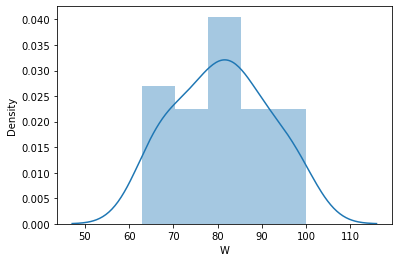

In [68]:

sns.distplot (data["W"])

### there is no skewness in output data 

<AxesSubplot:xlabel='R', ylabel='Density'>

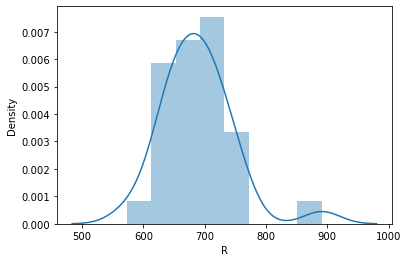

In [69]:

sns.distplot (data["R"])

### there is  less skewness in R 
### skewness of 1.200786 , more than threshold value 

<AxesSubplot:xlabel='AB', ylabel='Density'>

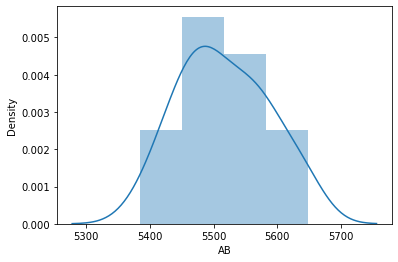

In [70]:

sns.distplot (data["AB"])

### there is  very  less  skewness in AB

<AxesSubplot:xlabel='H', ylabel='Density'>

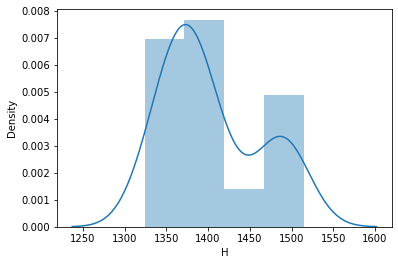

In [71]:

sns.distplot (data["H"])

### there is  skewness in H
### skewness is more than threshold  value 

<AxesSubplot:xlabel='2B', ylabel='Density'>

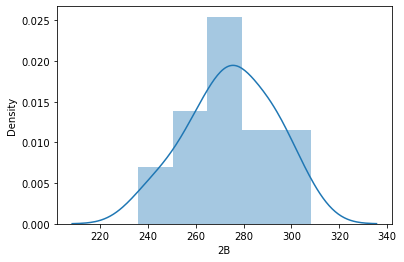

In [72]:

sns.distplot (data["2B"])

# there is very less skewness 


<AxesSubplot:xlabel='3B', ylabel='Density'>

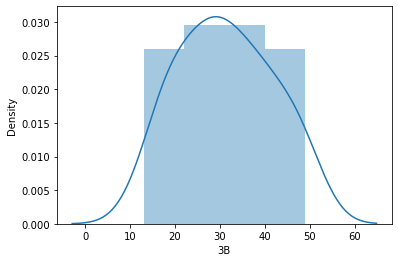

In [73]:

sns.distplot (data["3B"])

 
 ### there is almost no skewness , but very less skewness is preset 

<AxesSubplot:xlabel='BB', ylabel='Density'>

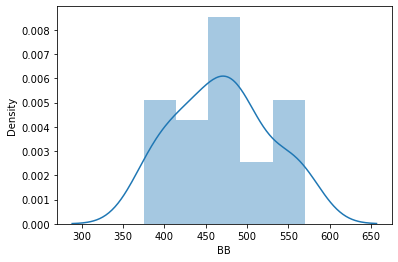

In [74]:

sns.distplot (data["BB"])

   ### BB has very  less skewness

<AxesSubplot:xlabel='SO', ylabel='Density'>

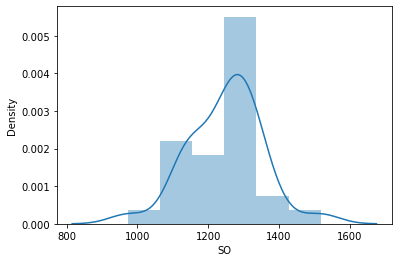

In [75]:

sns.distplot (data["SO"])

### SO has less skewness 

<AxesSubplot:xlabel='SB', ylabel='Density'>

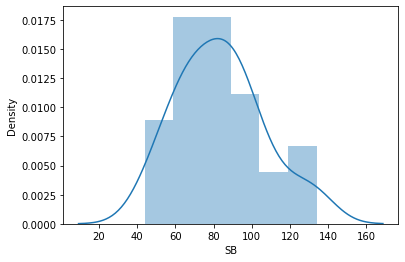

In [76]:

sns.distplot (data["SB"])

### SB has less skewness 

<AxesSubplot:xlabel='RA', ylabel='Density'>

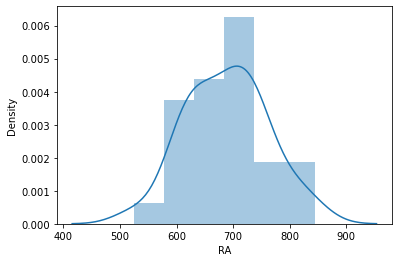

In [77]:

sns.distplot (data["RA"])

### RA has   very less skewness 

<AxesSubplot:xlabel='ER', ylabel='Density'>

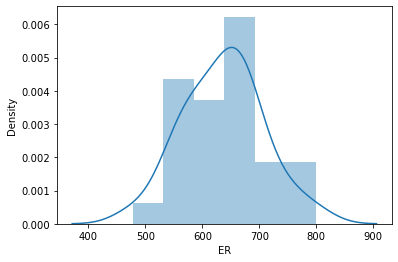

In [78]:

sns.distplot (data["ER"])

### ER has very less skewness 

<AxesSubplot:xlabel='ERA', ylabel='Density'>

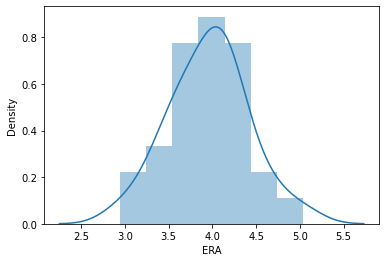

In [79]:

sns.distplot (data["ERA"])

### ERA has very less skewness 

<AxesSubplot:xlabel='CG', ylabel='Density'>

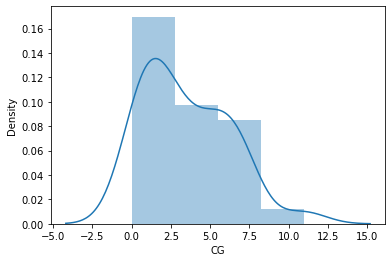

In [80]:

sns.distplot (data["CG"])

 ###    cg has skewness 

<AxesSubplot:xlabel='SHO', ylabel='Density'>

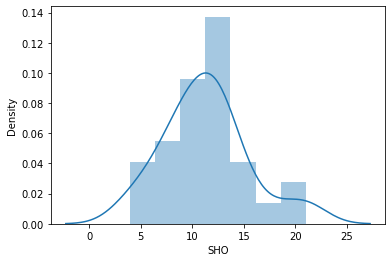

In [81]:

sns.distplot (data["SHO"])

### sho has skewness 

<AxesSubplot:xlabel='SV', ylabel='Density'>

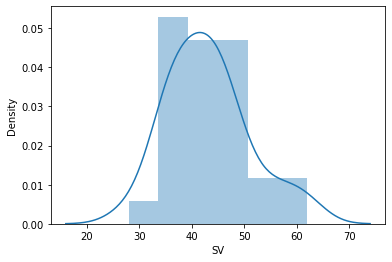

In [82]:

sns.distplot (data["SV"])

### SV has less skewness

<AxesSubplot:xlabel='HR', ylabel='Density'>

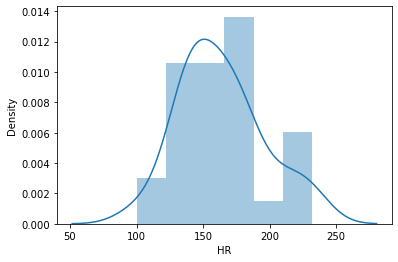

In [83]:

sns.distplot (data["HR"])

### HR has very less skewness 

<AxesSubplot:xlabel='E', ylabel='Density'>

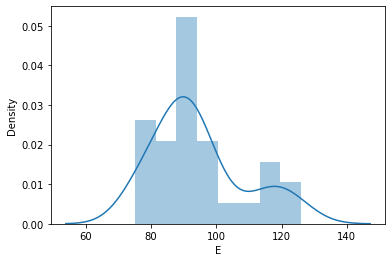

In [84]:

sns.distplot (data["E"])

### E has skewness 


#  Bivariate Analysis

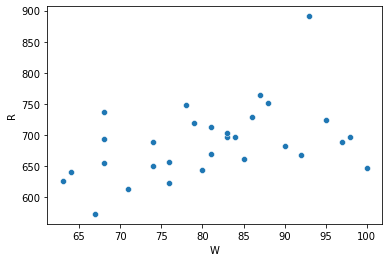

In [85]:


sns.scatterplot("W","R" , data = data)
plt.show()

### there is no much relation  between predicted runs and runs scored 
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

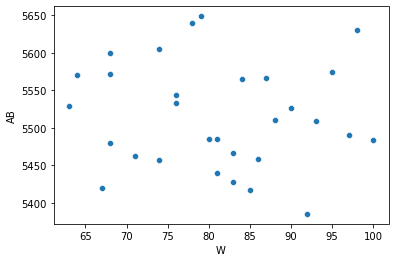

In [86]:
sns.scatterplot("W","AB" , data = data)
plt.show()

### there is no much relation  between predicted runs and At bats per home run
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

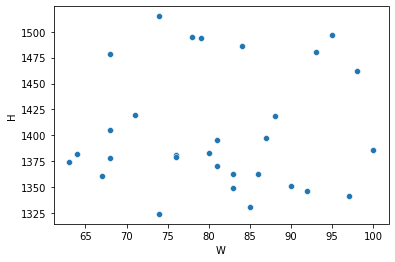

In [87]:
sns.scatterplot("W","H" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and HIT
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

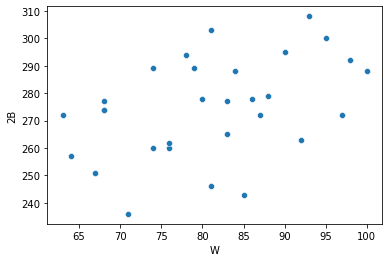

In [88]:
sns.scatterplot("W","2B" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and  2B
###  The data points are spread out  more in this graph ,   but shows a low positive correlation 

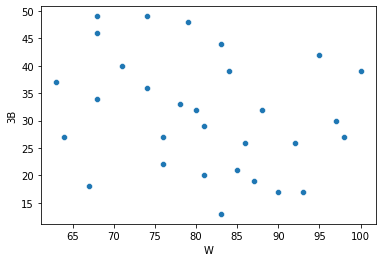

In [89]:
sns.scatterplot("W","3B" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and  3B
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

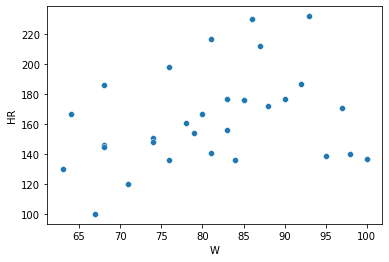

In [90]:
sns.scatterplot("W","HR" , data = data)
plt.show()

###  The data points are spread out  more in this graph ,  but shows a low positive correlation 

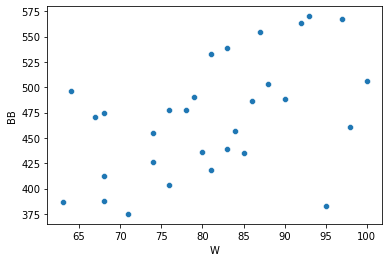

In [91]:
sns.scatterplot("W","BB" , data = data)
plt.show()



###  The data points are spread out  more in this graph ,  but shows a low positive correlation 

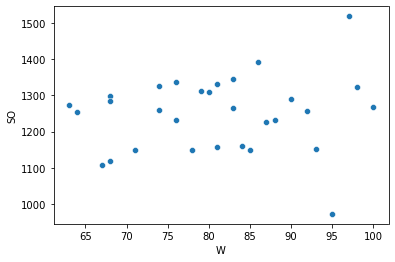

In [92]:
sns.scatterplot("W","SO" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and   SO
###  The data points are spread out  more in this graph ,  but shows a low positive correlation 

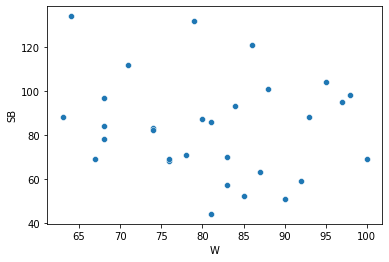

In [93]:
sns.scatterplot("W","SB" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and  SB
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

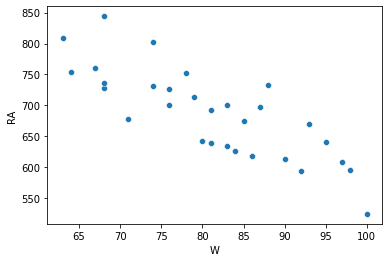

In [94]:
sns.scatterplot("W","RA" , data = data)
plt.show()


###  The data points are spread out  more in this graph.  , also there is a low negative trend/distribution 

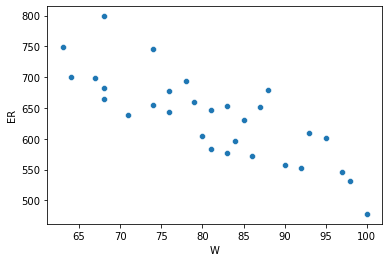

In [95]:
sns.scatterplot("W","ER" , data = data)
plt.show()


###  The data points are spread out  more in this graph.  , also there is a low negative trend/distribution 

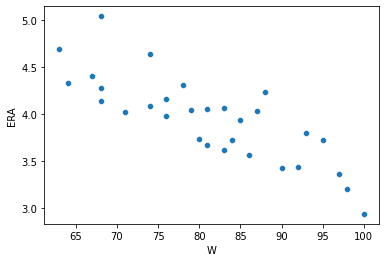

In [96]:
sns.scatterplot("W","ERA" , data = data)
plt.show()


###  The data points are spread out  more in this graph.  , also there is a low negative trend/distribution 

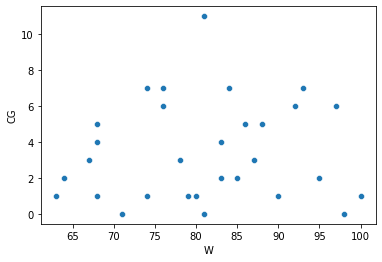

In [97]:
sns.scatterplot("W","CG" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and   CG
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

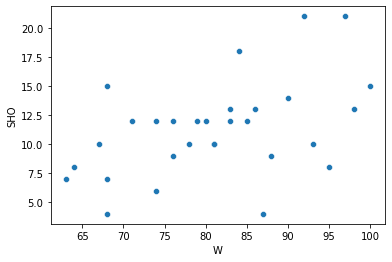

In [98]:
sns.scatterplot("W","SHO" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and   SHO
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

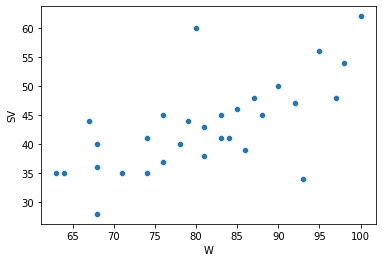

In [99]:
sns.scatterplot("W","SV" , data = data)
plt.show()

###  The data points are spread out  more in this graph ,  but shows a low positive correlation 

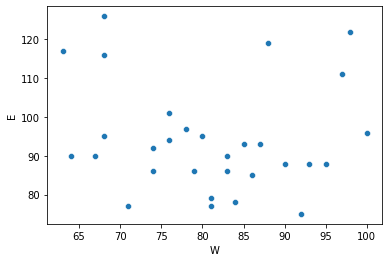

In [100]:
sns.scatterplot("W","E" , data = data)
plt.show()

### there is no much relation  between PREDICTED RUNS and   E
###  The data points are spread out  more in this graph. This means there is no trend to the data; thus, there is no correlation.

# Checking for correlation of data 

In [101]:
cor = data.corr()

In [102]:
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


## correlation with heatmap

<AxesSubplot:>

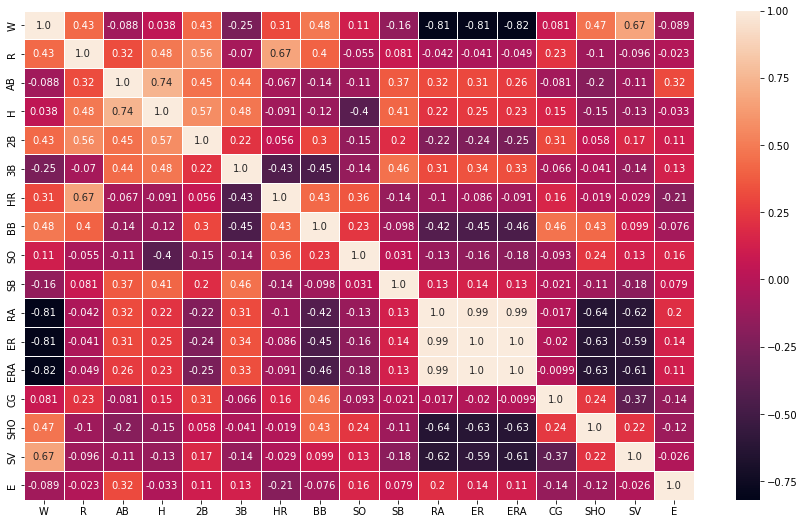

In [103]:
plt.figure(figsize =  (15,9))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [284]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if (data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

H
ER
ERA
ERA


# hypothesis testing

In [239]:
from scipy import stats
from scipy.stats  import ttest_ind

In [233]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [269]:
stats.ttest_ind(data["H"],data["R"])

Ttest_indResult(statistic=47.80000299524707, pvalue=2.757325635930024e-48)

In [270]:
pvalue=2.757325635930024e-48

In [271]:
if pvalue > 0.05:
    print(" null hypothes is rejected")
else:
    print( " alternative hypothesis is acepted")

 alternative hypothesis is acepted


In [273]:
stats.ttest_ind(data["2B"],data["BB"])

Ttest_indResult(statistic=-17.786274679910534, pvalue=3.6973740453021225e-25)

In [274]:
pvalue=3.6973740453021225e-25

In [275]:
if pvalue > 0.05:
    print(" null hypothes is rejected")
else:
    print( " alternative hypothesis is acepted")

 alternative hypothesis is acepted


In [276]:
stats.ttest_ind(data["AB"],data["H"])

Ttest_indResult(statistic=248.29721717303104, pvalue=1.728832622243963e-89)

In [277]:
 pvalue=1.728832622243963e-89

In [278]:
if pvalue > 0.05:
    print(" null hypothes is rejected")
else:
    print( " alternative hypothesis is acepted")

 alternative hypothesis is acepted


In [280]:
stats.ttest_ind(data["HR"],data["R"])

Ttest_indResult(statistic=-42.997753169634166, pvalue=1.084808005389262e-45)

In [281]:
pvalue=1.084808005389262e-45

In [282]:
if pvalue > 0.05:
    print(" null hypothes is rejected")
else:
    print( " alternative hypothesis is acepted")


 alternative hypothesis is acepted


In [283]:
stats.ttest_ind(data["ER"],data["ERA"])

Ttest_indResult(statistic=49.34162458397568, pvalue=4.5687956663058965e-49)

In [285]:
 pvalue=4.5687956663058965e-49

In [286]:
if pvalue > 0.05:
    print(" null hypothes is rejected")
else:
    print( " alternative hypothesis is acepted")

 alternative hypothesis is acepted


## variable inflation factor 


In [253]:
def calc_vif(x):
    vif= pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [254]:
calc_vif(x)

,variables,VIF
0,R,415.564764
1,H,572.132929
2,2B,597.438693
3,BB,151.266518
4,SO,155.727188
5,SB,18.024819
6,CG,5.102671
7,SHO,12.975755
8,SV,60.607633
9,E,53.517445


### as ERA and ER are highly correlated with  RA, we need to drop ERA and  ER

In [106]:
data_new = data.drop(["ERA","ER"] , axis = 1 )

In [107]:
data_new  # after dropping highly  correlated data ,  created a new data 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97


In [108]:
data_new.corr()["W"]

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

# Checking for outliers 

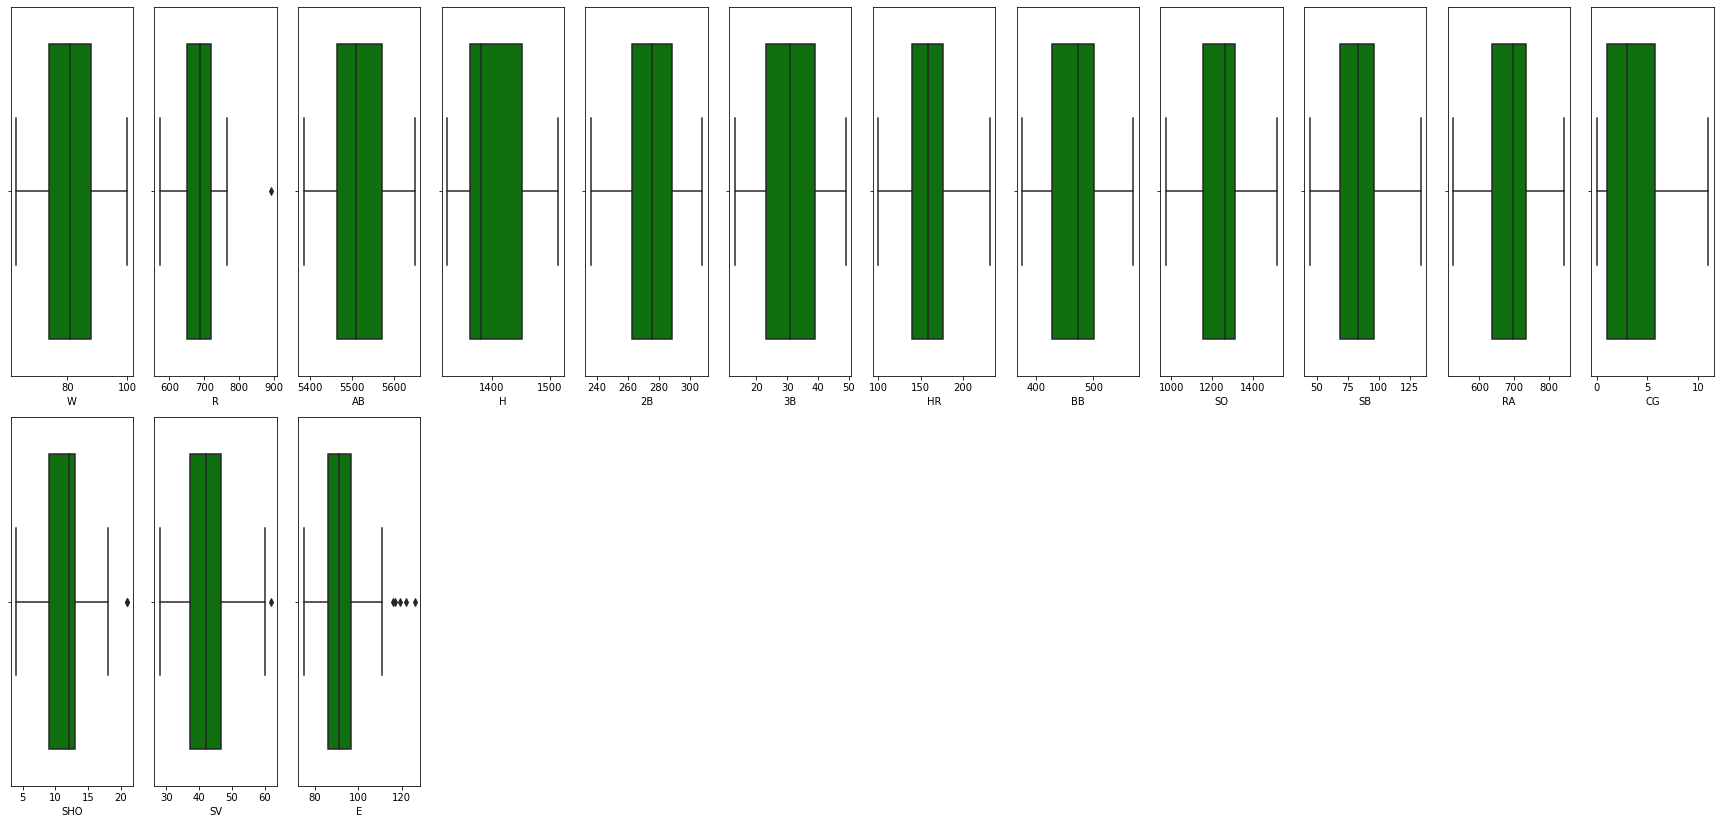

In [109]:
column = data_new.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data_new[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

### from above graph we can see the outliers are present in R, SHO , SV , E

In [110]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data_new))
data_new.shape

(30, 15)

In [111]:
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.171757,0.320914,0.396360,0.194303


In [112]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [113]:
len(np.where(z>3)[0])

1

In [114]:
df = data_new[(z<3).all(axis=1)]

In [115]:
df.shape

(29, 15)

In [116]:
df  # new data set after deleting outliers 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


# seperating x / input and y / output data

In [288]:
x = df.drop(["W","H"] , axis = 1) 

In [190]:
x = df.drop(["W","RA","AB","H","3B","R","E","SB"] , axis = 1) 

In [289]:
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,289,49,151,455,1259,83,803,7,12,35,86
6,764,5567,272,19,212,554,1227,63,698,3,4,48,93
7,713,5485,246,20,217,418,1331,44,693,0,10,43,77
8,644,5485,278,32,167,436,1310,87,642,1,12,60,95
9,748,5640,294,33,161,478,1148,71,753,3,10,40,97
10,751,5511,279,32,172,503,1233,101,733,5,9,45,119


In [290]:
y = df["W"]

In [291]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Scaling the data

In [292]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler ()

In [293]:

x = mms.fit_transform(x) 


# testing training and  splitting the data for machine learning

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics  import    mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [295]:
ln = LinearRegression()
ln

LinearRegression()

In [330]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,r2_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , r2_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  97.33394518662605
 testing  score is  0 is 7.350164165463324 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  95.06509116242027
 testing  score is  1 is 71.24828193366955 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  94.33193906431589
 testing  score is  2 is -32.94078202772941 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  92.12845097174014
 testing  score is  3 is 84.06843479063096 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  93.84646894513234
 testing  score is  4 is 81.61778374621042 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  94.4872043085244
 testing  score is  5 is 44.255280538089345 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  91.20265349514665
 testing  score

In [338]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 47,test_size = .20)

In [339]:
ln.fit(x_train,y_train)

LinearRegression()

In [340]:
pred_train = ln.predict(x_train)

In [341]:
pred_test = ln.predict(x_test)

In [342]:
lss =r2_score(y_test, pred_test)

In [577]:
print('R2 score is ',lss)

R2 score is  0.8817927736662221



##  R 2 score   is  0.9535784080175025


# cross validating the model

In [344]:
from  sklearn.model_selection import cross_val_score
from  sklearn.model_selection import  KFold


In [345]:
for j in range(2,10):
    ls_score = cross_val_score(ln,x,y,cv = j)
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", lss *100)
    print("\n")

at cv : 2
cross validation score is : -181.2000366274062
r 2 score =  95.35784080175024


at cv : 3
cross validation score is : 16.029707621810278
r 2 score =  95.35784080175024


at cv : 4
cross validation score is : 27.985587126909994
r 2 score =  95.35784080175024


at cv : 5
cross validation score is : 24.195190916400183
r 2 score =  95.35784080175024


at cv : 6
cross validation score is : 22.64872848986918
r 2 score =  95.35784080175024


at cv : 7
cross validation score is : 2.019410212490824
r 2 score =  95.35784080175024


at cv : 8
cross validation score is : 29.449518185799057
r 2 score =  95.35784080175024


at cv : 9
cross validation score is : -539.2680396122646
r 2 score =  95.35784080175024




In [346]:
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)

In [450]:
for j in range(2,10):
    ls_score = (cross_val_score(ln,x,y,cv = kn))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("r 2 score = ", lss *100)
    print("\n")

at cv : 2
cross validation score is : 11.691264927159047
r 2 score =  93.25534126674415


at cv : 3
cross validation score is : 56.88562919517414
r 2 score =  93.25534126674415


at cv : 4
cross validation score is : 36.87089506037472
r 2 score =  93.25534126674415


at cv : 5
cross validation score is : 54.40309808732621
r 2 score =  93.25534126674415


at cv : 6
cross validation score is : 68.82253829670904
r 2 score =  93.25534126674415


at cv : 7
cross validation score is : 63.601802407486154
r 2 score =  93.25534126674415


at cv : 8
cross validation score is : 45.69284520512012
r 2 score =  93.25534126674415


at cv : 9
cross validation score is : 52.383636465088635
r 2 score =  93.25534126674415




In [366]:
kn = KFold(5,shuffle = True)
l = (cross_val_score(ln,x,y,cv = kn))
cros_val_score = l.mean()

In [367]:
cros_val_score*100

71.52805244140046

### cross validation score is 71.52

Text(0.5, 1.0, 'linear regression')

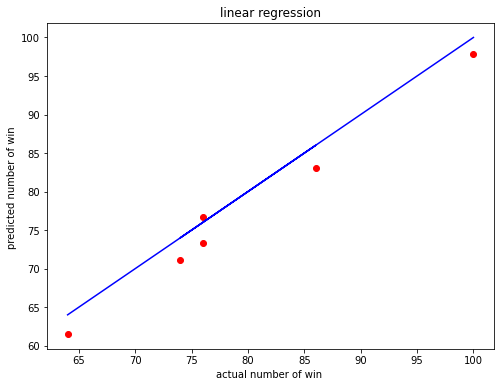

In [390]:
plt.figure(figsize = (8,6))
plt.scatter( x =  y_test , y  = pred_test , color = "r")
plt.plot(y_test, y_test , color = "b")
plt.xlabel("actual number of win ")
plt.ylabel("predicted number of win ")
plt.title("linear regression")

In [453]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge

In [461]:
parameters = { "alpha" :[0.0001,0.001,0.01,0.1,1,10], "random_state" : list(range(0,10))}
ls = Lasso()
cls =   GridSearchCV(ls,parameters)
cls. fit(x_train,y_train)
cls.best_params_

{'alpha': 0.1, 'random_state': 0}

In [527]:
ls = Lasso(alpha = 0.1, random_state = 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls =  ls.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

0.9325534126674415

In [534]:
cv_score_1 = cross_val_score(ls,x,y,cv = 4)

In [535]:
cv_score_1.mean()

0.6933302716410056

In [463]:
parameters = { "alpha" :[0.0001,0.001,0.01,0.1,1,10], "random_state" : list(range(0,10))}
Rg =  Ridge()
cls =   GridSearchCV(ls,parameters)
cls. fit(x_train,y_train)
cls.best_params_

{'alpha': 0.1, 'random_state': 0}

In [561]:
Rg = Ridge(alpha = 0.1, random_state = 0)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)
pred_ls =  Rg.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

0.8817927736662221

In [571]:
cv_score_1 = cross_val_score(Rg,x,y,cv = 4)
cv_score_1.mean()

0.549380207893198

#  the Accuracy score  for the model with linear regression is 0.9535784080175025
# and cross validation score  is  0.7152805244140046

# saving model 

In [572]:
import joblib

In [573]:
joblib.dump(ln,"Baseball_ln.obj")

['Baseball_ln.obj']

In [574]:
ln_fromj_oblib = joblib.load("Baseball_ln.obj")

In [576]:
ln_fromj_oblib.predict(x_test)

array([97.86537205, 73.38431666, 71.12062079, 83.01860174, 76.63533726,
       61.51505141])